# Divizija


In [1]:
from IPython import *
from IPython.display import *


In [2]:
import copy
import math
import numbers
import time


In [3]:
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D


In [4]:
import shapely as sh
import shapely.geometry as gm


In [5]:
%matplotlib inline


In [6]:
sym.init_printing()


In [7]:
tr = pd.read_csv(
    'data/triangles/a.tsv',
    sep = "\t",
    header = None,
    index_col = None,
    names = ['x0', 'y0', 'x1', 'y1', 'x2', 'y2']
)


In [8]:
tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129448 entries, 0 to 1129447
Data columns (total 6 columns):
x0    1129448 non-null float64
y0    1129448 non-null float64
x1    1129448 non-null float64
y1    1129448 non-null float64
x2    1129448 non-null float64
y2    1129448 non-null float64
dtypes: float64(6)
memory usage: 51.7 MB


In [9]:
ev = pd.read_csv(
    'data/triangles/b.tsv',
    sep = "\t",
    header = None,
    index_col = None,
    names = ['l0']
)


In [10]:
ev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129448 entries, 0 to 1129447
Data columns (total 1 columns):
l0    1129448 non-null float64
dtypes: float64(1)
memory usage: 8.6 MB


In [11]:
df = pd.read_csv(
    'data/triangles/ab.tsv',
    sep = "\t",
    header = None,
    index_col = None,
    names = ['x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'l0']
)


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129448 entries, 0 to 1129447
Data columns (total 7 columns):
x0    1129448 non-null float64
y0    1129448 non-null float64
x1    1129448 non-null float64
y1    1129448 non-null float64
x2    1129448 non-null float64
y2    1129448 non-null float64
l0    1129448 non-null float64
dtypes: float64(7)
memory usage: 60.3 MB


In [13]:
(df.l0.min(), df.l0.max())


In [14]:
df.loc[np.abs(df.l0 - df.l0.min()) < 0.1]


,x0,y0,x1,y1,x2,y2,l0
1630,0.5,0.0,0.0000,0.865026,-0.5,0.0,52.790165
1631,0.5,0.0,0.0000,0.865526,-0.5,0.0,52.779327
1632,0.5,0.0,0.0000,0.866025,-0.5,0.0,52.724820
3262,0.5,0.0,0.0005,0.864526,-0.5,0.0,52.816303
3263,0.5,0.0,0.0005,0.865026,-0.5,0.0,52.814851
3264,0.5,0.0,0.0005,0.865526,-0.5,0.0,52.772876
4895,0.5,0.0,0.0010,0.865026,-0.5,0.0,52.803360


In [15]:
df.loc[np.abs(df.l0 - df.l0.max()) < 100.0]


,x0,y0,x1,y1,x2,y2,l0
1128351,0.5,0.0,0.4925,0.050472,-0.5,0.0,5737.629428
1128495,0.5,0.0,0.4930,0.050472,-0.5,0.0,5745.374716
1128631,0.5,0.0,0.4935,0.050472,-0.5,0.0,5753.146987
1128758,0.5,0.0,0.4940,0.050472,-0.5,0.0,5760.946108
1128876,0.5,0.0,0.4945,0.050472,-0.5,0.0,5768.771975
1128985,0.5,0.0,0.4950,0.050472,-0.5,0.0,5776.624487
1129084,0.5,0.0,0.4955,0.050472,-0.5,0.0,5784.503434
1129173,0.5,0.0,0.4960,0.050472,-0.5,0.0,5792.408733
1129251,0.5,0.0,0.4965,0.050472,-0.5,0.0,5800.340259
1129318,0.5,0.0,0.4970,0.050472,-0.5,0.0,5808.297880


In [16]:
m = int(df.x1.unique().size)
n = int(df.y1.unique().size)


In [17]:
(m, n)


In [18]:
x = np.load('data/triangles/x.npy')
y = np.load('data/triangles/y.npy')

X = np.load('data/triangles/X.npy')
Y = np.load('data/triangles/Y.npy')

l = np.load('data/triangles/l.npy')


In [19]:
(~np.isnan(l.ravel())).sum()


1129448

In [20]:
l_rav = l.ravel().copy(order = 'F')
l_rav = l_rav[~np.isnan(l_rav)].copy(order = 'F')

lev = np.concatenate(
    (
        [l_rav.min()],
        [np.quantile(l_rav, float(i) / 100.0) for i in range(5, 96, 5)],
        [l_rav.max()]
    ))
try:
    del i
except (NameError, UnboundLocalError):
    pass
lev = np.array(
    lev,
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

log10_lev = np.array(
    np.log10(lev),
    dtype = float,
    copy = True,
    order = 'F',
    subok = False,
    ndmin = 1
)

lev[0] -= 0.1
lev[-1] += 0.1
log10_lev[0] -= 0.1
log10_lev[-1] += 0.1

del l_rav


In [21]:
lev.size


In [22]:
lev


array([  52.62481994,   63.6716518 ,   70.92453293,   78.31006079,
         86.35365593,   95.38624729,  105.79815561,  117.96375   ,
        132.35281431,  150.22287395,  172.05213708,  199.86004436,
        235.02692794,  281.30336263,  350.25387583,  443.74728898,
        583.9851278 ,  814.7964604 , 1242.60457175, 2190.44859428,
       5832.42601815])

(array([0.27483237, 1.06721992, 1.16223338, 1.17748271, 1.15726435,
        1.11131224, 1.05773525, 1.0003008 , 0.90905287, 0.84854459,
        0.76844614, 0.71031912, 0.64055054, 0.52516209, 0.48661009,
        0.41922773, 0.34566584, 0.27280386, 0.20308539, 0.09518313]),
 array([1.62201511, 1.80394612, 1.85079648, 1.89381756, 1.93628073,
        1.97948576, 2.0244781 , 2.07174857, 2.12173318, 2.17673607,
        2.23566007, 2.30072598, 2.37111762, 2.44917492, 2.54438295,
        2.64713571, 2.76640179, 2.91104913, 3.09433295, 3.34053307,
        3.86584179]),
 <a list of 20 Patch objects>)

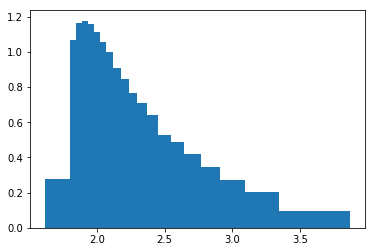

In [23]:
plt.hist(np.log10(l.ravel()), bins = log10_lev, density = True)


In [24]:
I = np.isnan(l)

#l[I] = 1.0e-16

X = np.ma.MaskedArray(X, mask = I)
Y = np.ma.MaskedArray(Y, mask = I)
l = np.ma.MaskedArray(l, mask = I)

del I


In [25]:
(np.format_float_scientific(lev[0]), np.format_float_scientific(lev[-1]))


('5.262481994e+01', '5.83242601815e+03')

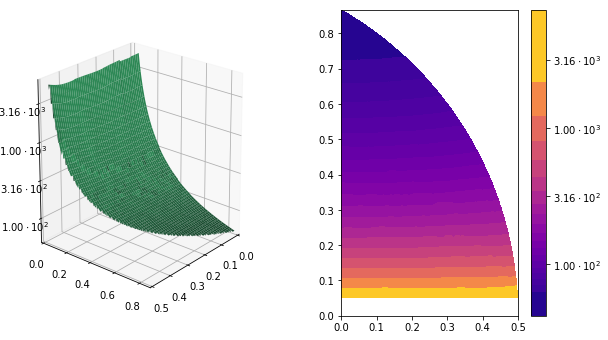

In [26]:
fig = plt.figure(num = 'Eigenvalues', figsize = (10, 5.625))

ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122)

ax0.plot_surface(X, Y, np.log10(l.data), color = 'seagreen')
cs = ax1.contourf(X, Y, np.log10(l), levels = log10_lev, cmap = plt.cm.plasma)

ax0.set_xlim((0.0, 0.5))
ax0.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)
ax0.set_zlim((float(np.log10(lev[0])), float(np.log10(lev[-1]))))

ax1.set_xlim((0.0, 0.5))
ax1.set_ylim(
    (
        0.0,
        0.8660254037844386467637231707529361834714026269051903140279034897
    )
)

ax0.view_init(20.0, 40.0)

ax1.set_aspect('equal')

ax0.set_zticks([2.0, 2.5, 3.0, 3.5])
ax0.set_zticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

cbar = fig.colorbar(
    cs,
    ax = ax1,
    ticks = [2.0, 2.5, 3.0, 3.5],
    spacing = 'proportional'
)

cbar.ax.set_yticklabels(
    [
        "$ 1.00 \cdot 10^{2} $",
        "$ 3.16 \cdot 10^{2} $",
        "$ 1.00 \cdot 10^{3} $",
        "$ 3.16 \cdot 10^{3} $"
    ]
)

plt.show()
